**Name:** Singh Lucky Santosh <br>
**Class:** TE-A <br>
**Branch:** E&TC <br>
**Roll No:** 08 <br> <br>
**Experiment No. 3**

**Statement:** Load the dataset: birthwt Risk Factors Associated with Low Infant Birth Weight at https://raw.github.com/neurospin/pystatsml/master/datasets/birthwt.csv

1.Test the association of mother’s (bwt) age and birth weight using the correlation test and linear regeression.

2.Test the association of mother’s weight (lwt) and birth weight using the correlation testand linear regeression.

3.Produce two scatter plot of: (i) age by birth weight; (ii) mother’s weight by birth weight. Elaborate the Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/birthwt (1).csv")

In [3]:
def calc_covariance(dataset1,dataset2):
    '''
 Def : Covariance measures the relationship trend
 between two sets of data.
 Formula : 1) Σ((X - X_mean)*(Y - Y_mean)) ∕ n
    '''

    mean1 = np.mean(dataset1)
    mean2 = np.mean(dataset2)
    return np.sum(np.multiply(dataset1-mean1,dataset2-mean2))/len(dataset1)

In [4]:
def correlation(dataset1,dataset2):
    '''
 Def : Covariance measures the relationship trend between two sets of data.
 Formula : 1) cov(x,y)/(std(x)*std(y))
 '''
    cov =calc_covariance(dataset1,dataset2)
    sd1 = np.std(dataset1)
    sd2 = np.std(dataset2)
    
    return cov/(sd1*sd2)

1. Test the association of mother’s (bwt) age and birth weight using the correlation test and linear regeression. 
<br>

*   Using correlation coefficients test :

In [5]:
# Age of mother
age = df["age"]
age = age.to_numpy()

# Birth weight in grams
birthwt = df["bwt"]
birthwt = birthwt.to_numpy()

In [6]:
correlation(age, birthwt)

0.0903178136685326

Text(0, 0.5, 'Birth weight(Kg)')

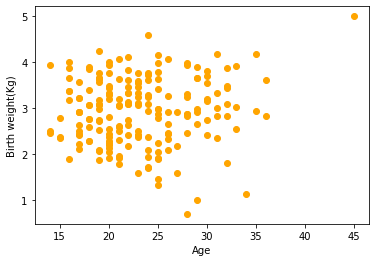

In [8]:
# Converting birth weight from gram to kg for better scaling
plt.scatter(age,birthwt/1000,c ="orange")
plt.xlabel("Age")
plt.ylabel("Birth weight(Kg)")

**Conclusion**:

The corellation value is 0.09 which is very low, this means the correlation is non-existent between the maternal age and birth weight.



*   Using simple linear regression :



In [9]:
lr = LinearRegression()
age = age.reshape(-1,1)
lr.fit(age,birthwt)


LinearRegression()

In [10]:
y = lr.predict(age)
print("Coefficients :",lr.coef_[0])
print("intercept :",lr.intercept_)

Coefficients : 12.429712027714634
intercept : 2655.744469705171


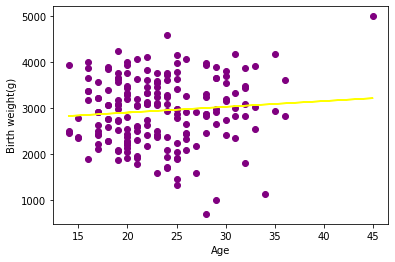

In [13]:
plt.plot(age,y,color= "yellow")
plt.scatter(age,birthwt,c= "purple")
plt.xlabel("Age")
plt.ylabel("Birth weight(g)")
plt.show()

2. Test the association of mother’s weight (lwt) and birth weight using the correlation testand linear regeression.


*  Using correlation coefficients test :



In [14]:
# Mother's weight during last menstrual period.(in pounds)
motherswt = df["lwt"]
motherswt =motherswt.to_numpy()

# converting in grams to pounds
birthwt = birthwt/454

In [15]:
correlation(motherswt,birthwt)

0.18573328444909923

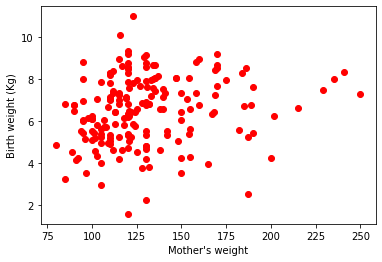

In [16]:
plt.xlabel("Mother's weight")
plt.ylabel("Birth weight (Kg)")
plt.scatter(motherswt,birthwt,c = "red")

**Conclusion**:

The correlation value is 0.18573328444909923 which is positive correlation, but the value is small which means the correlation is positive and small between the maternal weight and birth weight.



*  Using simple linear regression :



In [17]:
motherswt =motherswt.reshape(-1,1)
lr.fit(motherswt,birthwt)

LinearRegression()

In [18]:
z = lr.predict(motherswt)
print("Coefficients :",lr.coef_[0])
print("intercept :",lr.intercept_)

Coefficients : 0.009755743626323136
intercept : 5.219435061396471


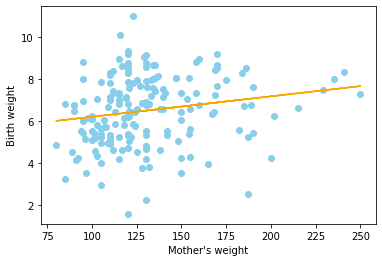

In [19]:
plt.plot(motherswt,z,c="orange")
plt.scatter(motherswt,birthwt,c ="skyblue")
plt.xlabel("Mother's weight")
plt.ylabel("Birth weight")
plt.show()